In [59]:
import pandas as pd
import numpy as np
from pandas.io import sql
from sqlalchemy import create_engine
import csv
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
db_user = 'postgres'
db_password = ''
db_host = 'localhost'
db_port = 5432
database = 'climbing'

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
connection = create_engine(conn_str)

In [3]:
df_crags = pd.read_sql('select * from crags',connection,index_col='index')
df_crags['climb_list'] = [eval(flat) for flat in df_crags['climbs_flat']]
df_crags = df_crags.drop('climbs_flat',axis=1)
df_crags

,url,cragname,climbs,rocktype,altitude,faces,lat,long,climb_list
index,,,,,,,,,
4,https://www.ukclimbing.com/logbook/crag.php?id=4,Dinas Cromlech,79,Rhyolite,500.0,S,53.0917,-4.0489,"[(3166, 0), (3167, 0), (3168, 3), (3169, 1), (..."
5,https://www.ukclimbing.com/logbook/crag.php?id=5,Bus Stop Quarry,115,Slate,450.0,None,53.1294,-4.1058,"[(141016, 1), (136481, 1), (134391, 1), (1309,..."
6,https://www.ukclimbing.com/logbook/crag.php?id=6,Craig Pant Ifan (Tremadog),176,Dolerite,NaN,S,52.9436,-4.1311,"[(152703, 0), (100182, 1), (2561, 2), (2562, 2..."
7,https://www.ukclimbing.com/logbook/crag.php?id=7,St. Govan's Head,151,Limestone,12.0,SW,51.5977,-4.9277,"[(401447, 0), (138693, 1), (58187, 1), (150671..."
8,https://www.ukclimbing.com/logbook/crag.php?id=8,Carreg-y-Barcud Area,128,Sandstone (hard),13.0,S,51.8719,-5.2350,"[(503566, 0), (503567, 0), (503568, 0), (50356..."
...,...,...,...,...,...,...,...,...,...
27429,https://www.ukclimbing.com/logbook/crag.php?id...,Gap Bon ami boulders,0,UNKNOWN,NaN,None,48.8067,-64.2198,[]
27430,https://www.ukclimbing.com/logbook/crag.php?id...,Metal Expert,8,UNKNOWN,NaN,None,45.5454,25.5181,"[(560519, 3), (560520, 3), (560521, 0), (56052..."
27431,https://www.ukclimbing.com/logbook/crag.php?id...,Las Palomas,3,UNKNOWN,NaN,None,28.1159,-16.5589,"[(560451, 2), (560452, 2), (560453, 2)]"


In [4]:
df_climbs = pd.read_sql('select * from climbs',connection,index_col='index')
df_climbs['logs'] = [eval(flat) for flat in df_climbs['logs_flat']]
df_climbs = df_climbs.drop('logs_flat',axis=1)
df_climbs

,url,climbname,rating,grade,crag_id,num_comments,type,num_worded_comments,comments_flat,logs
index,,,,,,,,,,
3166,https://www.ukclimbing.com/logbook/c.php?i=3166,Millwood's Wall,0,S 4a,4,0,trad,0,'',{}
3167,https://www.ukclimbing.com/logbook/c.php?i=3167,Vanishing Point,0,E1 5b,4,2,trad,0,' ',"{'187067': '', '63530': ''}"
3168,https://www.ukclimbing.com/logbook/c.php?i=3168,The Thing,3,E2 5c,4,124,trad,24,""" Joe led this in one pitch, taking the direct...","{'253245': '', '206609': 'Joe led this in one ..."
3169,https://www.ukclimbing.com/logbook/c.php?i=3169,Rootorooni,1,E3 5c,4,0,trad,0,'',{}
3170,https://www.ukclimbing.com/logbook/c.php?i=3170,Cobweb Crack,2,VS 5a,4,181,trad,41,' Note that the description in the CC Llanbe...,"{'185136': '', '197782': '', '6106': '', '2410..."
...,...,...,...,...,...,...,...,...,...,...
560510,https://www.ukclimbing.com/logbook/c.php?i=560510,El chivo loco,0,6b,27432,0,lead,0,'',{}
560511,https://www.ukclimbing.com/logbook/c.php?i=560511,Victorking,0,6b+,27432,0,lead,0,'',{}
560512,https://www.ukclimbing.com/logbook/c.php?i=560512,Puto Maldonado,0,6c+,27432,0,lead,0,'',{}


In [5]:
df_users = pd.read_sql('select * from users',connection,index_col='index')
df_users['climbs'] = [eval(flat) for flat in df_users['climbs_flat']]
df_users = df_users.drop('climbs_flat',axis=1)
df_users

,logbook_url,profile_url,username,num_climbs,climbs
index,,,,,
100002,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Stephanelericolais,3,"[42012, 147314, 18853]"
10002,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Piers Harley,100,"[4348, 4360, 38698, 9981, 9961, 9987, 9968, 99..."
100025,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,george5699,16,"[33002, 34313, 31435, 38715, 33342, 86139, 352..."
100031,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Tak,17,"[10969, 10969, 10941, 10971, 10917, 10342, 103..."
100045,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,smeaton,46,"[9636, 9631, 9630, 70266, 9595, 9594, 9593, 96..."
...,...,...,...,...,...
99962,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,spilla,19,"[14076, 14075, 14074, 14073, 14071, 14070, 140..."
99967,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Andrewbirkett,70,"[81721, 51757, 37451, 33152, 33154, 86212, 954..."
99978,https://www.ukclimbing.com/logbook/showlog.php...,https://www.ukclimbing.com/user/profile.php?id...,Jamie Nobbs,48,"[8603, 8602, 34950, 8596, 32990, 32275, 47459,..."


In [6]:
with open('list_of_words.csv', 'r') as f:
    reader = csv.reader(f)
    list_of_words = list(reader)
list_of_words = np.unique(np.array(list_of_words[0]))


In [7]:
def climbs_flat(climb_list):
    flat = ""
    for climb in climb_list:
        flat += climb + ' '
    return flat

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [1]:
df_test = df_climbs[(df_climbs['num_worded_comments']>10) & (df_climbs['type']=='trad')]

NameError: name 'df_climbs' is not defined

In [171]:
list_of_words = ['sloper','pinch','crimp','jug']

In [172]:

cv_climbing_words = TfidfVectorizer(ngram_range=(1,2),stop_words='english')

climbs_nlp_spmat = cv_climbing_words.fit_transform(df_test.comments_flat.values)


In [173]:
climbs_nlp_spmat

<1618x128853 sparse matrix of type '<class 'numpy.float64'>'
	with 349751 stored elements in Compressed Sparse Row format>

In [174]:
climbs_nlp = pd.DataFrame(climbs_nlp_spmat.asformat('array'),columns=cv_climbing_words.get_feature_names(),index=df_test.index)




In [175]:
climbs_nlp

,00am,00am partying,01,01 02,01 18,01 19,01 2011,02,02 17,02 feb,...,zippys traverse,zone,zone chuffed,zone day,zone ll,zone omens,zone superb,zone went,zoned,zoned just
index,,,,,,,,,,,,,,,,,,,,,
163279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122794,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [176]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [177]:
def num_there(s):
    return any(i.isdigit() for i in s)

In [178]:
num_there('nd')

False

In [179]:
analyser.polarity_scores('good')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}

In [243]:
vocab=[]
for i in climbs_nlp.columns:
    sent = analyser.polarity_scores(i)
    if len(i.split())==1 and sent['neu'] == 1 and num_there(i)==False:
        vocab.append(i.lower())
    elif len(i.split())>1 and num_there(i)==False:
        vocab.append(i.lower())

In [244]:
len(vocab)

115827

In [245]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

In [246]:
pca = TruncatedSVD(n_components=10)
# data_fit = pca.fit_transform(climbs_nlp)
data_fit_onlyneu = pca.fit_transform(climbs_nlp[vocab])

In [247]:

model = KMeans(n_clusters = 10)

model.fit(data_fit_onlyneu)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [248]:
model.labels_

array([4, 2, 7, ..., 4, 2, 1], dtype=int32)

In [249]:
df_test['labels'] = model.labels_

/Users/max/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [250]:
df_test.labels.value_counts()

9    500
2    257
5    187
3    145
6    139
4    121
0     92
1     88
8     48
7     41
Name: labels, dtype: int64

In [54]:
from wordcloud import WordCloud

In [60]:

def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    return wordcloud

In [280]:
def col_to_flat(comments_flat):
    total_flat = ""
    for comments in tqdm(comments_flat):
        for word in comments.split():
            if word.lower() in vocab:
                total_flat = total_flat + " " + word 
    return total_flat

In [276]:
value_counts()

9    500
2    257
5    187
3    145
6    139
4    121
0     92
1     88
8     48
7     41
Name: labels, dtype: int64

In [271]:
'great' in vocab

False

In [272]:
vocab

['aa',
 'aa got',
 'aaa',
 'aaa aaaaaa',
 'aaaaaa',
 'aaaaaa aaaaaaa',
 'aaaaaaa',
 'aaaaaages',
 'aaaaaages falling',
 'aaaaah',
 'aaaaah good',
 'aaaaggees',
 'aaaaggees ago',
 'aaaah',
 'aaaah warmup',
 'aaagghh',
 'aaagghh best',
 'aaagh',
 'aaagh amazing',
 'aaah',
 'aaah despreate',
 'aaargghhh',
 'aaargghhh maybe',
 'aaarrg',
 'aaarrg proper',
 'aah',
 'aah classic',
 'aardvark',
 'aardvark start',
 'aargh',
 'aargh close',
 'aaron',
 'aaron broke',
 'aarrgghh',
 'aarrgghh dropped',
 'aarrrr',
 'aarrrr hold',
 'ab_channel',
 'ab_channel willsmith',
 'abandoned crack',
 'abandoned using',
 'abattoir',
 'abattoir unless',
 'abbey',
 'abbey just',
 'aberdeen',
 'aberdeen smeary',
 'abilities luckily',
 'ability dark',
 'ability fly',
 'ability knee',
 'ability mankyness',
 'ability reach',
 'ability required',
 'ability wise',
 'abit',
 'abit balance',
 'abit closer',
 'abit confused',
 'abit damp',
 'abit easier',
 'abit easy',
 'abit footledge',
 'abit got',
 'abit grim',
 'abit 

0



1



2



3



4



5



6



7



8


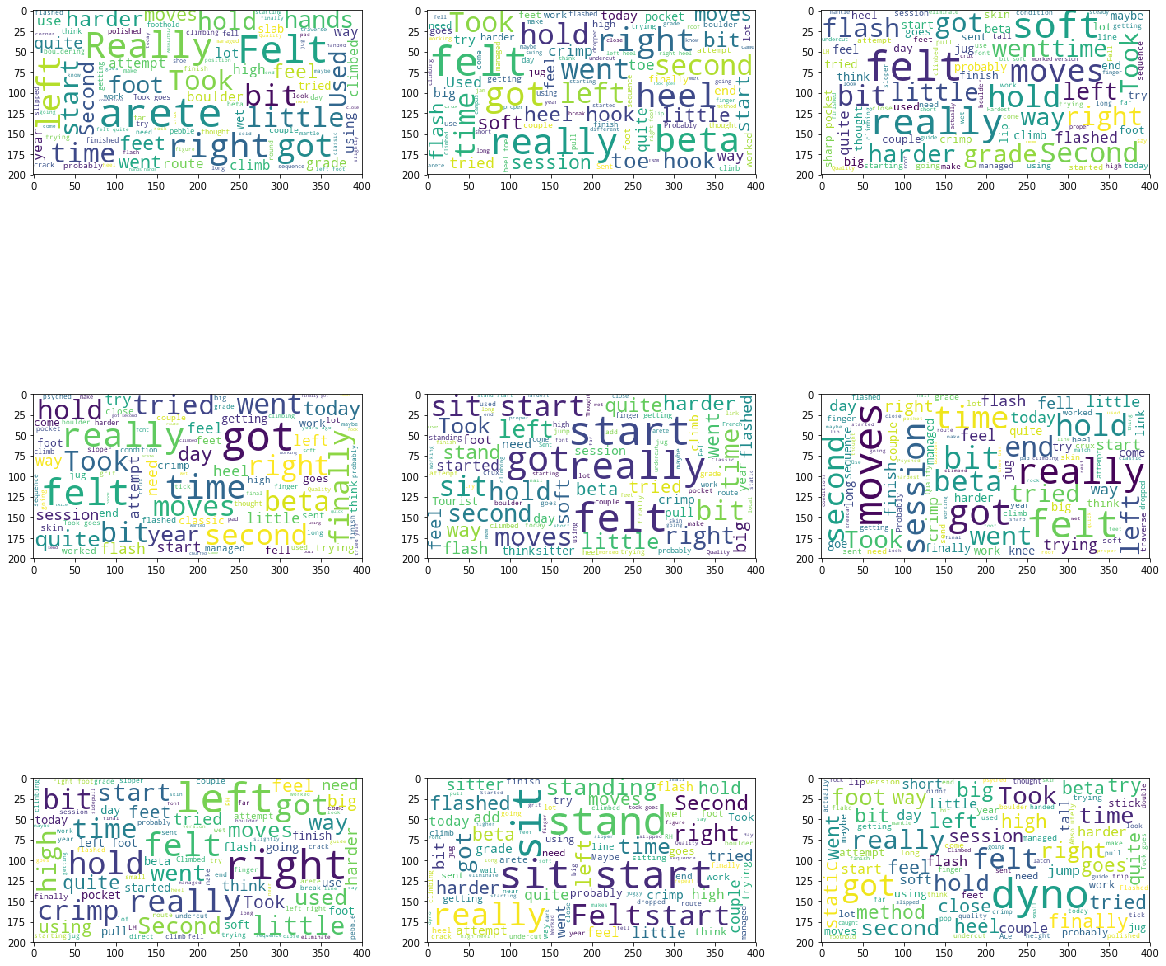

In [291]:
expandedLabelData